# Start-Ups

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Administrator\Downloads\50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
df1 = df.copy()
df1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


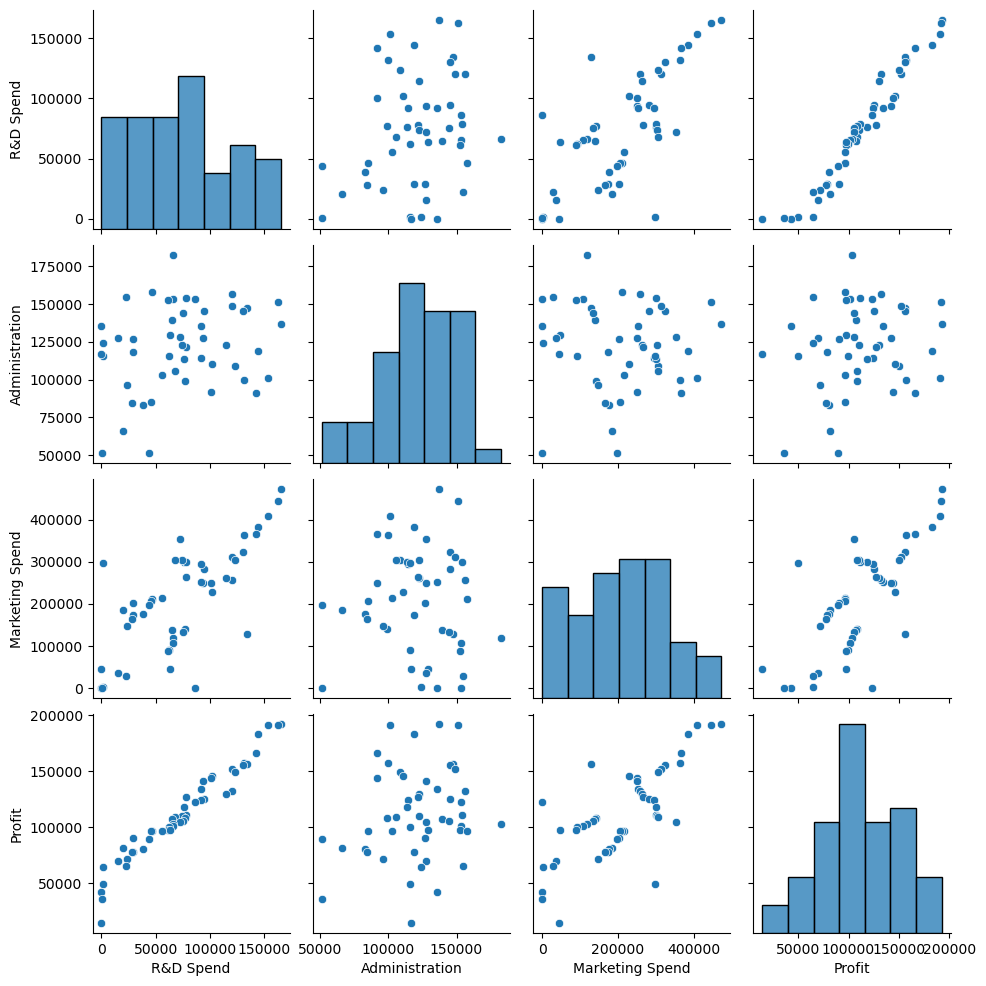

In [4]:
sns.pairplot(df1)

In [5]:
corrMatrix = df1.corr()

In [7]:
df1 = pd.get_dummies(df1, columns=['State'])

In [8]:
X = df1[['R&D Spend','Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
Y = df1[['Profit']]

In [12]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 12 Feb 2024   Prob (F-statistic):           1.34e-27
Time:                        11:56:07   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df1.describe

In [27]:
df=df.copy()
df=df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)
df.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: xlabel='state'>

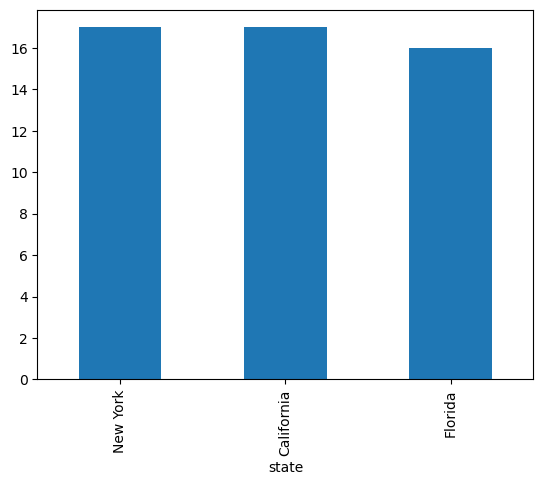

In [28]:
df['state'].value_counts().plot.bar()

In [66]:
startup = df.drop('State', axis = 1)
startup.head(7)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51


In [18]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

In [35]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RnD        50 non-null     float64
 1   admin      50 non-null     float64
 2   marketing  50 non-null     float64
 3   profit     50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [36]:
startup.columns

Index(['RnD', 'admin', 'marketing', 'profit'], dtype='object')

In [37]:
startup.isnull().sum()

RnD          0
admin        0
marketing    0
profit       0
dtype: int64

In [38]:
startup[df.values==0.0]

,RnD,admin,marketing,profit
19,86419.70,153514.11,0.00,122776.86
47,0.00,135426.92,0.00,42559.73
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


<Axes: >

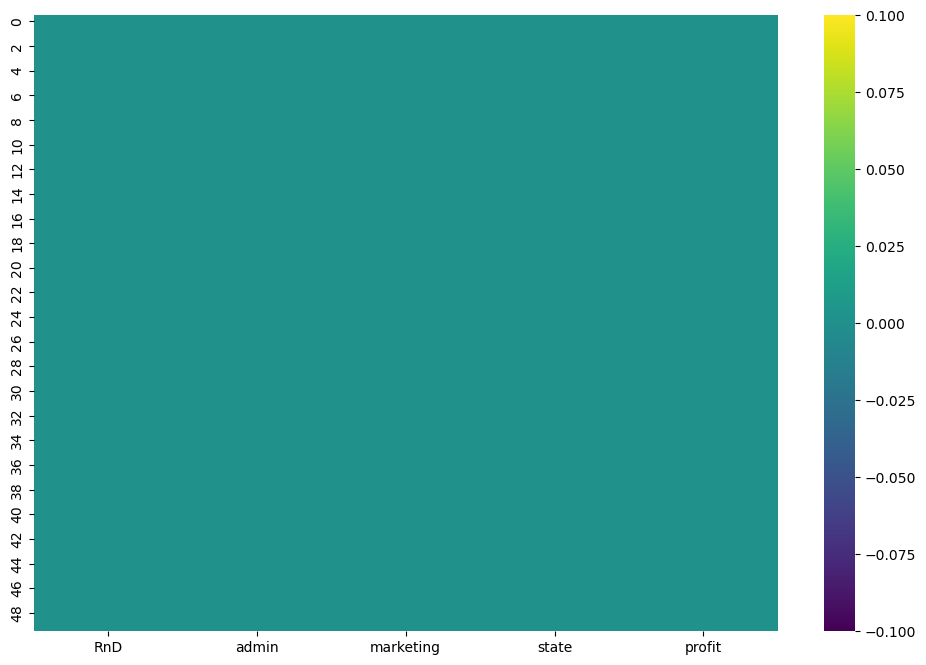

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [40]:
startup[startup.duplicated()].shape

(0, 4)

In [41]:
startup.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [42]:
startup[startup.duplicated()]

,RnD,admin,marketing,profit


In [43]:
startup.describe()

,RnD,admin,marketing,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [44]:
startup.shape

(50, 4)

<Axes: xlabel='Profit', ylabel='Density'>

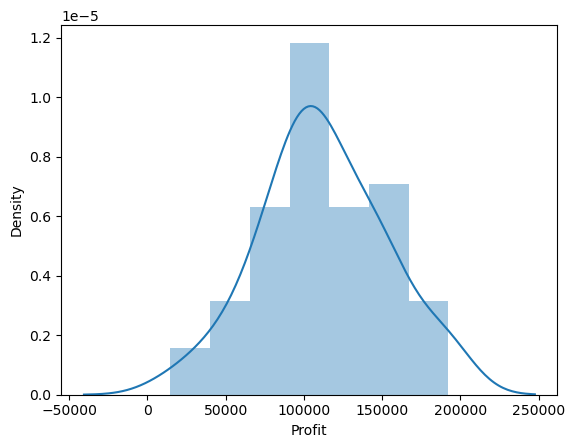

In [9]:
sns.distplot(df['Profit'])

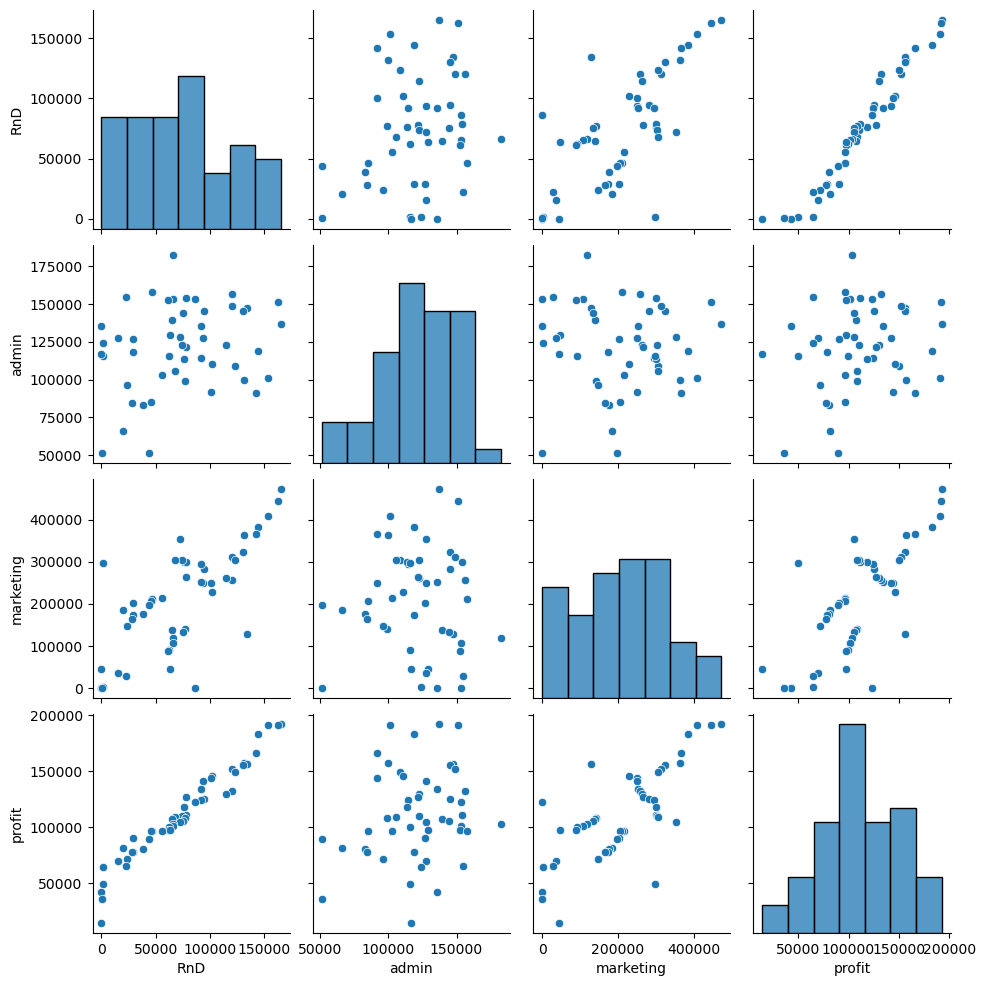

In [45]:
sns.pairplot(startup)

<Axes: >

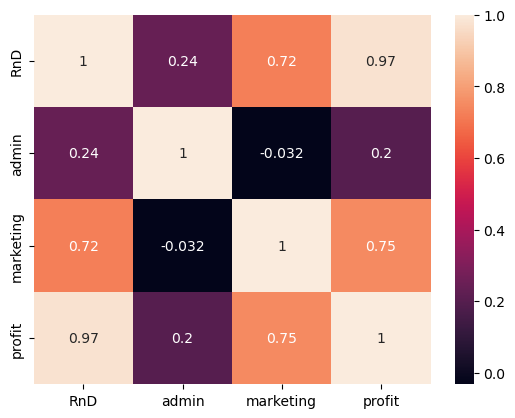

In [46]:
sns.heatmap(startup.corr(), annot=True)

In [68]:
import statsmodels.formula.api as slr

In [182]:
X = startup[['R&D Spend','Administration', 'Marketing Spend']]
Y = startup[['Profit']]

In [10]:
model = smf.OLS(Y, X).fit()
predictions = model.predict(X)

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.34e-27
Time:                        01:32:13   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8060      0.046     17.369      0.000       0.712       0.900
Administration      -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend      0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
infl = model.get_influence()

summ_df = infl.summary_frame()

summ_df.sort_values('cooks_d', ascending=False)

,dfb_R&D Spend,dfb_Administration,dfb_Marketing Spend,dfb_State_California,dfb_State_Florida,dfb_State_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
49,0.578956,-0.114232,0.080954,-0.566028,-0.246221,-0.231130,0.263959,-3.744509,0.101490,-1.258474,-4.484594,-1.507205
48,-0.112734,0.701599,0.418630,-0.783828,-0.801849,-0.951339,0.156376,-1.651796,0.255887,-0.968637,-1.686029,-0.988712
45,-0.212843,0.091394,-0.189969,0.095382,0.140857,0.295051,0.094395,1.966666,0.127729,0.752575,2.035721,0.779000
14,-0.221204,-0.257240,0.142195,0.267421,0.086725,0.275394,0.072017,-1.914478,0.105459,-0.657343,-1.976719,-0.678713
36,-0.379353,0.189523,0.218405,-0.107545,0.053174,-0.090698,0.059247,1.714446,0.107892,0.596224,1.754467,0.610141
38,-0.189819,-0.313449,0.109261,0.320201,0.309091,0.445171,0.055802,1.341034,0.156954,0.578628,1.353659,0.584076
15,-0.208289,0.066627,0.071114,-0.002577,0.007587,-0.143330,0.043416,-1.787748,0.075363,-0.510387,-1.835225,-0.523941
46,0.434369,-0.142646,-0.364064,0.106828,0.034265,0.093661,0.042323,-0.838336,0.265420,-0.503925,-0.835454,-0.502192
19,0.252210,0.039342,-0.342025,0.009492,0.035168,0.085832,0.032891,0.857080,0.211760,0.444236,0.854447,0.442872
27,0.271462,-0.146112,-0.339679,0.169919,0.186504,0.075224,0.032503,-1.063541,0.147057,-0.441609,-1.065166,-0.442284


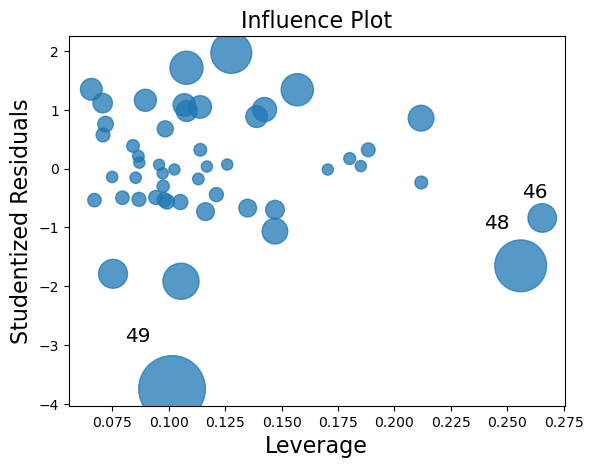

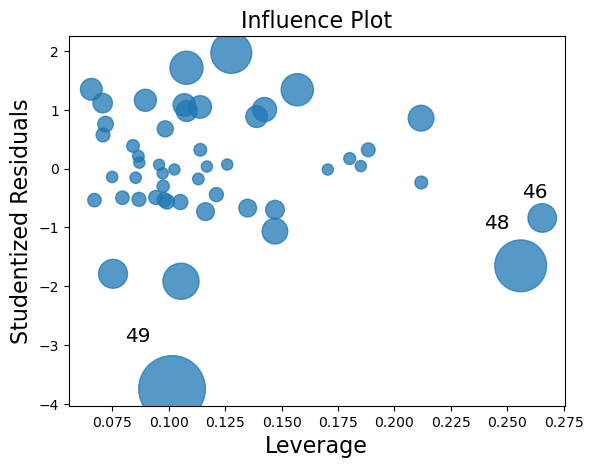

In [13]:
infl.plot_influence()

In [14]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,2.5,R&D Spend
1,1.2,Administration
2,2.4,Marketing Spend
3,9.0,State_California
4,9.4,State_Florida
5,9.2,State_New York


In [15]:
new_X = df1[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]

new_model = sm.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           9.72e-29
Time:                        01:33:37   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7967      0.042     18.771      0.000       0.711       0.882
Marketing Spend      0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
State_Florida      4.71e+04   3670.129     12.833      0.000    3.97e+04    5.45e+04
State_New York    4.694e+04   3342.591     14.043      0.000    4.02e+04    5.37e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     9.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
new_df = df1.drop(df1.index[[49,48]])

new_X = new_df[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
new_Y = new_df[['Profit']]

In [17]:
final_model = sm.OLS(new_Y, new_X).fit()

predictions = final_model.predict(new_X)
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     265.9
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           1.02e-29
Time:                        01:34:15   Log-Likelihood:                -494.30
No. Observations:                  48   AIC:                             998.6
Df Residuals:                      43   BIC:                             1008.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7692      0.035     22.072      0.000       0.699       0.840
Marketing Spend      0.0251      0.013      1.908      0.063      -0.001       0.052
State_California  5.183e+04   2710.866     19.120      0.000    4.64e+04    5.73e+04
State_Florida     5.046e+04   3078.590     16.391      0.000    4.43e+04    5.67e+04
State_New York     5.09e+04   2936.767     17.333      0.000     4.5e+04    5.68e+04
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.304
Skew:                           0.097   Prob(JB):                        0.859
Kurtosis:                       2.661   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X_sqrt = np.sqrt(new_df[['R&D Spend', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']])

model3 = sm.OLS(new_Y, X_sqrt).fit()
predictions3 = model3.predict(X_sqrt)

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     84.44
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           8.67e-20
Time:                        01:34:30   Log-Likelihood:                -519.91
No. Observations:                  48   AIC:                             1050.
Df Residuals:                      43   BIC:                             1059.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend          340.5455     25.777     13.211      0.000     288.560     392.531
Marketing Spend     20.0497     15.481      1.295      0.202     -11.170      51.270
State_California  1.836e+04   6267.224      2.930      0.005    5724.219     3.1e+04
State_Florida     1.692e+04   7013.669      2.413      0.020    2779.320    3.11e+04
State_New York    1.908e+04   6591.247      2.894      0.006    5782.772    3.24e+04
==============================================================================
Omnibus:                        7.588   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                7.161
Skew:                           0.941   Prob(JB):                       0.0279
Kurtosis:                       3.197   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
Y_sqrt = np.sqrt(new_df['Profit'])

model4 = sm.OLS(Y_sqrt, new_X).fit()
predictions4 = model4.predict(new_X)

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     223.3
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           3.68e-28
Time:                        01:34:49   Log-Likelihood:                -185.87
No. Observations:                  48   AIC:                             381.7
Df Residuals:                      43   BIC:                             391.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.0012   5.64e-05     20.622      0.000       0.001       0.001
Marketing Spend   2.473e-05   2.13e-05      1.159      0.253   -1.83e-05    6.78e-05
State_California   241.0032      4.390     54.894      0.000     232.149     249.857
State_Florida      240.7325      4.986     48.283      0.000     230.678     250.787
State_New York     240.9886      4.756     50.669      0.000     231.397     250.580
==============================================================================
Omnibus:                        4.530   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                3.371
Skew:                          -0.532   Prob(JB):                        0.185
Kurtosis:                       3.745   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model5 = sm.OLS(Y_sqrt, X_sqrt).fit()
predictions5 = model5.predict(X_sqrt)

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     141.7
Date:                Sat, 10 Feb 2024   Prob (F-statistic):           3.64e-24
Time:                        01:35:01   Log-Likelihood:                -196.16
No. Observations:                  48   AIC:                             402.3
Df Residuals:                      43   BIC:                             411.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.5271      0.030     17.371      0.000       0.466       0.588
Marketing Spend      0.0231      0.018      1.270      0.211      -0.014       0.060
State_California   187.8689      7.377     25.465      0.000     172.991     202.747
State_Florida      187.0162      8.256     22.652      0.000     170.366     203.666
State_New York     189.8076      7.759     24.463      0.000     174.160     205.455
==============================================================================
Omnibus:                        7.976   Durbin-Watson:                   1.243
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.007
Skew:                           0.870   Prob(JB):                       0.0301
Kurtosis:                       3.692   Cond. No.                     3.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Toyota Corrola

In [26]:
toyota = pd.read_csv(r'C:\Users\Administrator\Downloads\ToyotaCorolla.csv', encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [27]:
car = toyota[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
car

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [28]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [29]:
car.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [30]:
car.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [31]:
car.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


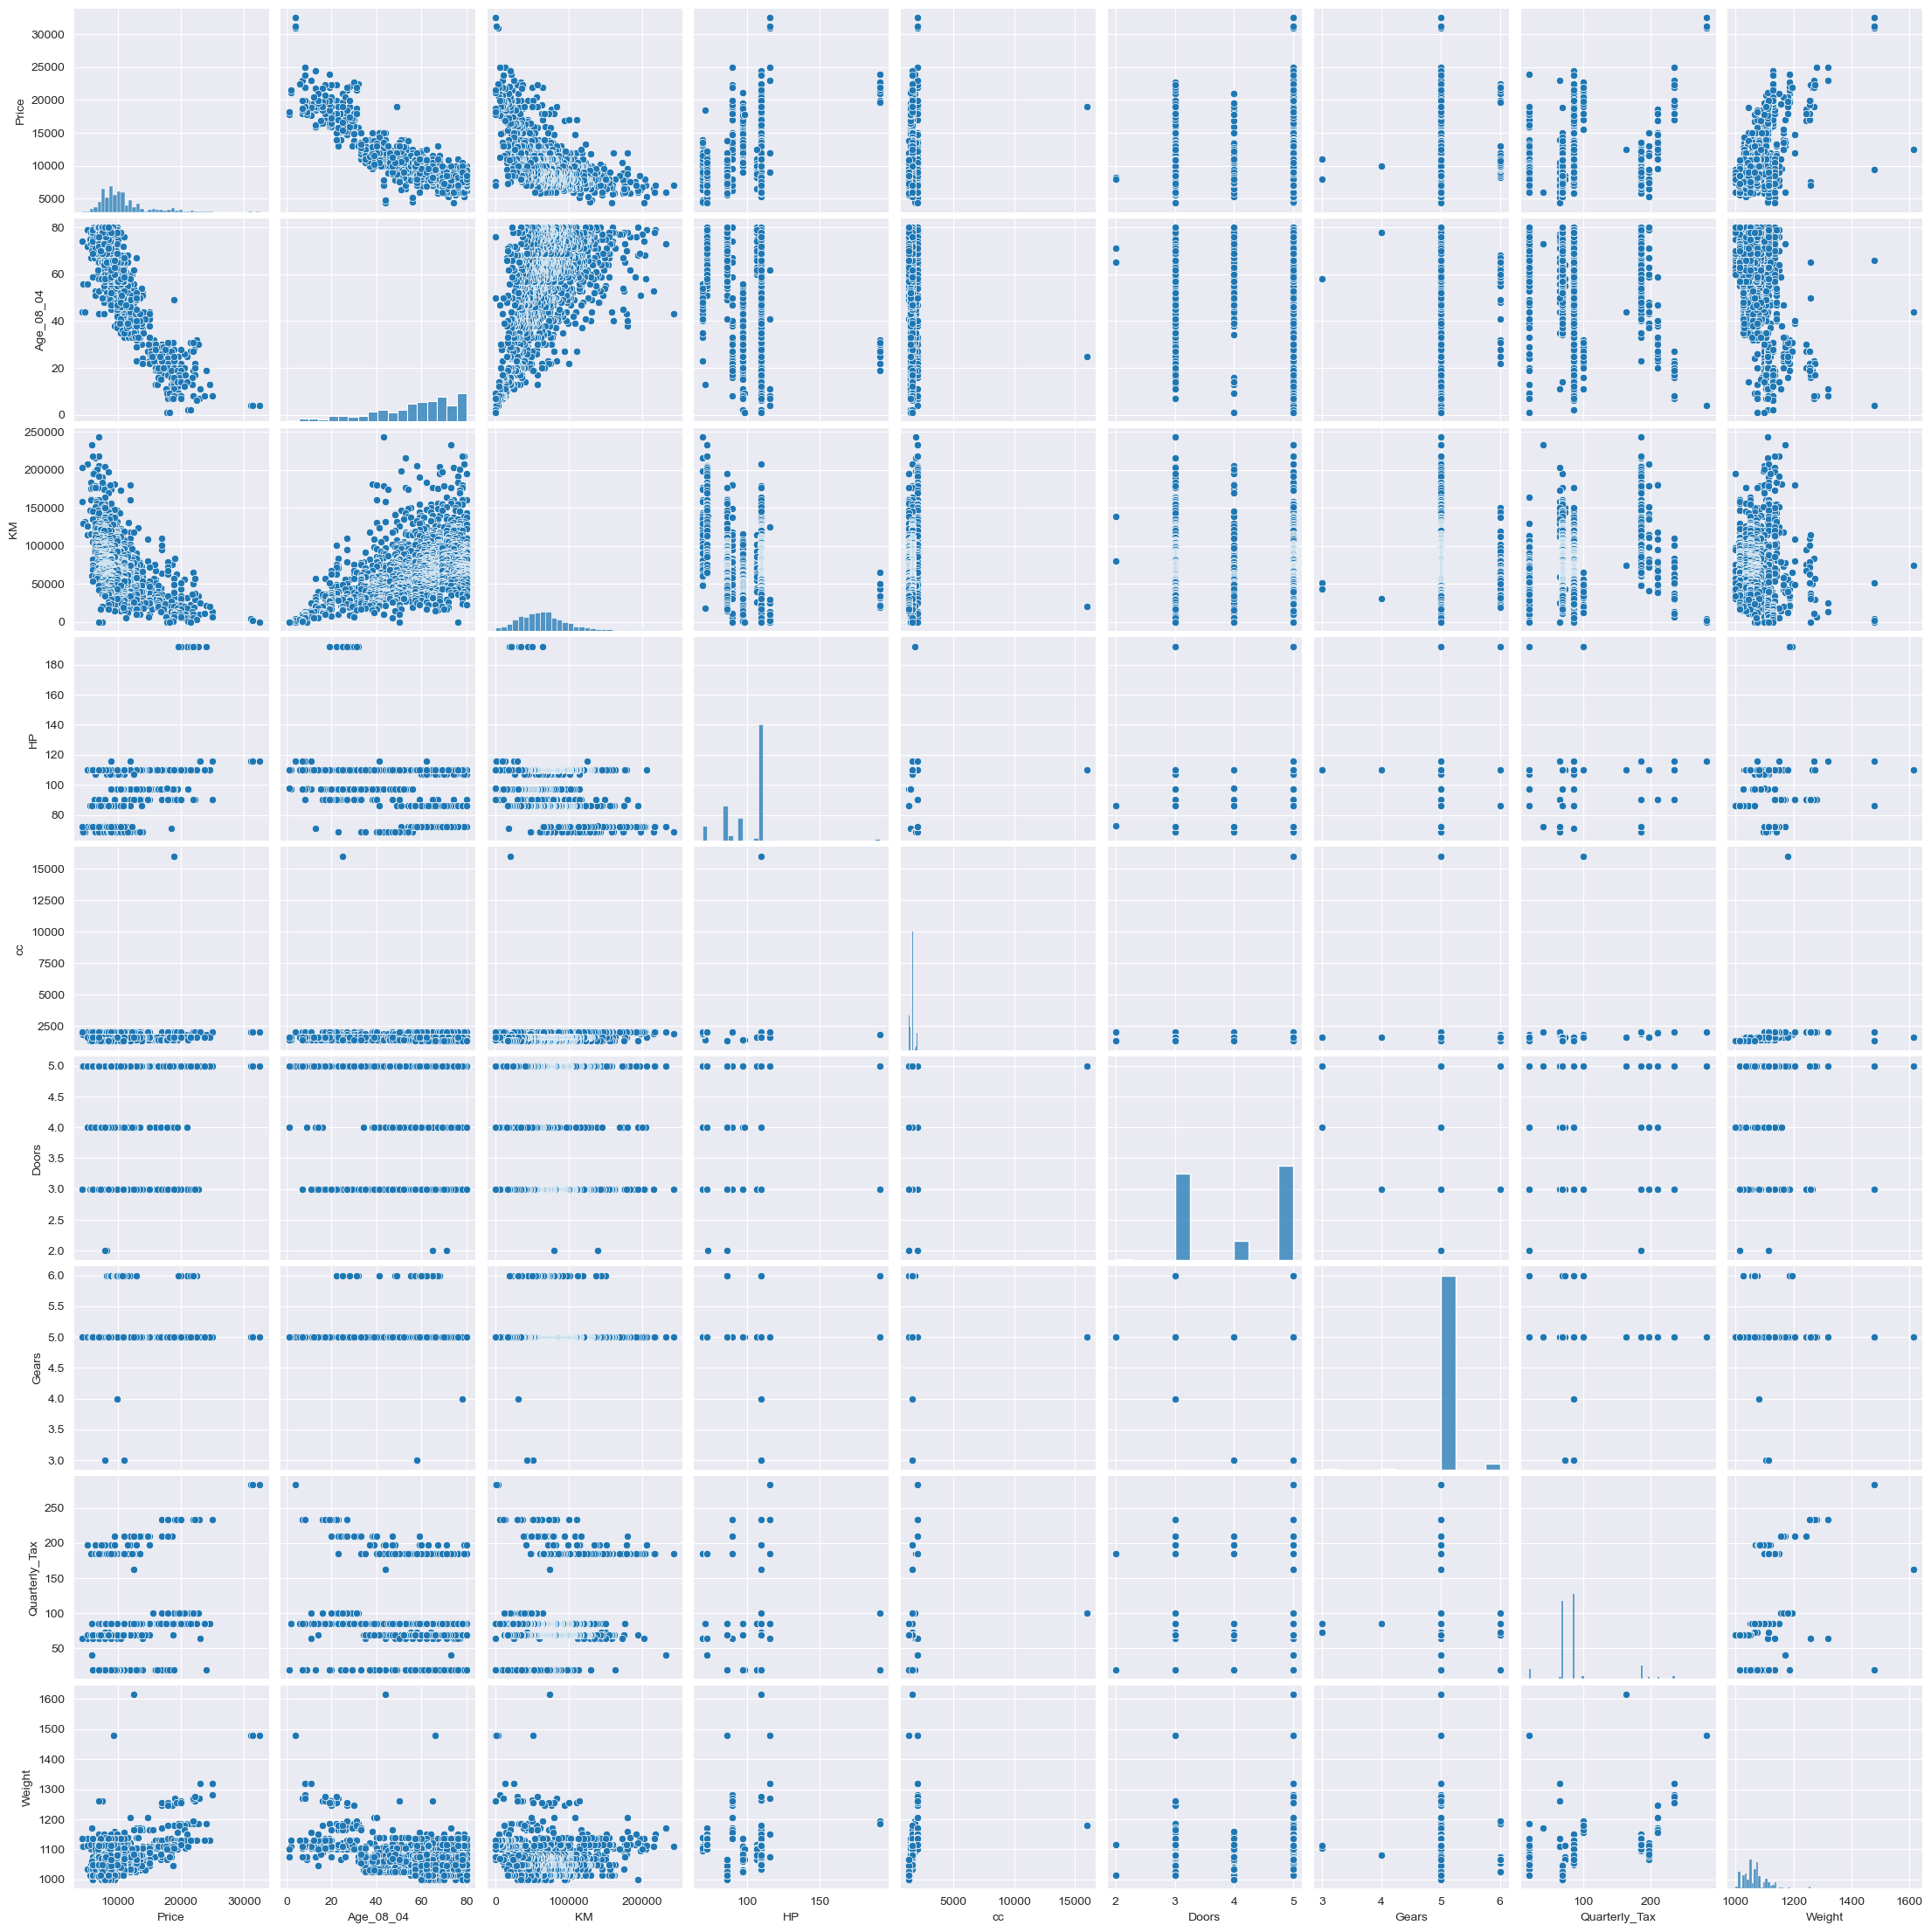

In [32]:
sns.set_style(style='darkgrid')  
sns.pairplot(car)

In [34]:
corrMatrix = car.corr()

<Axes: >

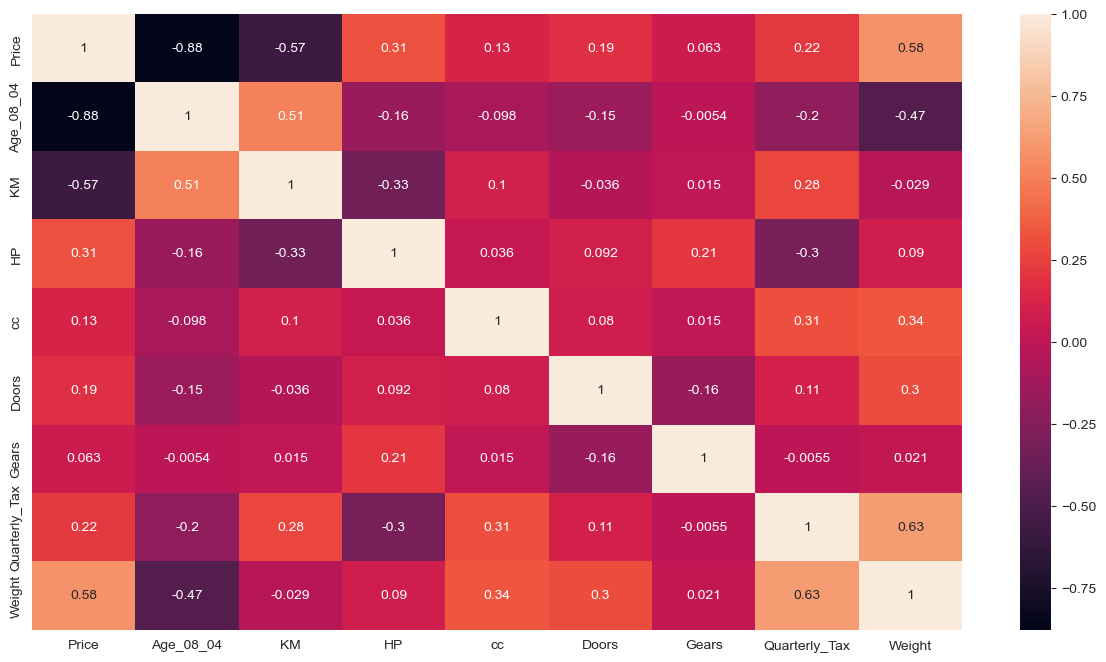

In [35]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corrMatrix, annot=True)

In [37]:
X = car[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
Y = car[['Price']]

In [38]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                          1.247e+04
Date:                Sat, 10 Feb 2024   Prob (F-statistic):                        0.00
Time:                        01:44:37   Log-Likelihood:                         -12383.
No. Observations:                1436   AIC:                                  2.478e+04
Df Residuals:                    1428   BIC:                                  2.482e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -125.4510      2.445    -51.303      0.000    -130.248    -120.654
KM               -0.0205      0.001    -16.305      0.000      -0.023      -0.018
HP               33.4737      2.796     11.973      0.000      27.990      38.958
cc               -0.1032      0.090     -1.141      0.254      -0.281       0.074
Doors            -7.2494     40.184     -0.180      0.857     -86.075      71.576
Gears            78.3780    148.258      0.529      0.597    -212.449     369.205
Quarterly_Tax     5.8258      1.227      4.748      0.000       3.419       8.233
Weight           14.0322      0.773     18.157      0.000      12.516      15.548
==============================================================================
Omnibus:                      108.641   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.996
Skew:                           0.019   Prob(JB):                    5.59e-123
Kurtosis:                       6.067   Cond. No.                     3.26e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
infl = model.get_influence()
summ_df = infl.summary_frame()

summ_df.sort_values('cooks_d', ascending=False)

,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,-0.289686,-2.363023e+00,-2.781734,2.615263e+01,0.645518,0.905398,-4.283020,-3.611394,8.241996e+01,7.678996,0.917911,25.678000,7.839881,26.215988
221,-0.255051,-2.607849e-02,0.174427,4.179288e-01,0.553762,1.572311,0.558929,-1.690024,3.719885e-01,-6.154172,0.072850,-1.725082,-6.235259,-1.747812
960,-0.208597,3.740370e-02,0.443719,1.977218e-01,0.539659,0.995730,0.788653,-1.264022,2.083232e-01,-4.104460,0.090022,-1.290963,-4.127441,-1.298191
109,0.104572,-2.934313e-01,0.114571,-1.902240e-01,-0.220145,-0.606577,0.332191,0.558699,1.226360e-01,4.952891,0.038456,0.990499,4.994239,0.998768
601,-0.213100,3.186680e-01,0.385097,-1.107466e-01,0.404397,0.551158,0.429648,-0.747923,9.677099e-02,-5.594639,0.024137,-0.879868,-5.654999,-0.889361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,-0.000069,-5.512316e-05,0.000142,6.568459e-05,0.000134,-0.000053,0.000083,-0.000039,1.558972e-08,-0.006835,0.002662,-0.000353,-0.006833,-0.000353
482,-0.000005,2.712128e-08,-0.000085,2.916555e-07,-0.000162,0.000013,-0.000026,0.000046,8.250836e-09,-0.006371,0.001623,-0.000257,-0.006369,-0.000257
1433,-0.000136,1.856487e-04,0.000104,1.209905e-05,0.000052,-0.000037,-0.000025,-0.000011,7.008564e-09,-0.002953,0.006388,-0.000237,-0.002952,-0.000237
397,-0.000015,4.001993e-05,0.000028,1.344847e-06,-0.000098,-0.000034,0.000125,0.000025,6.628524e-09,0.002440,0.008830,0.000230,0.002439,0.000230


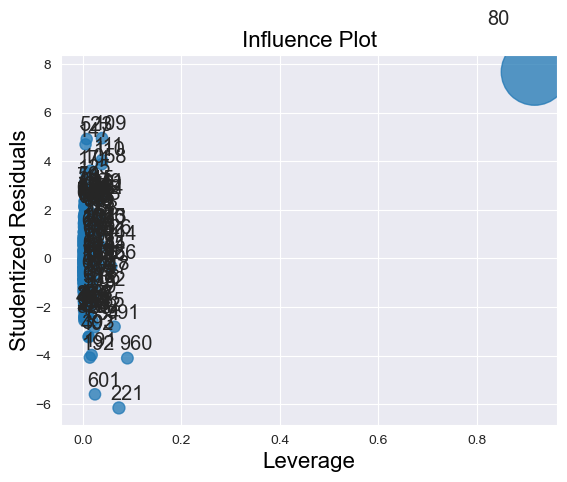

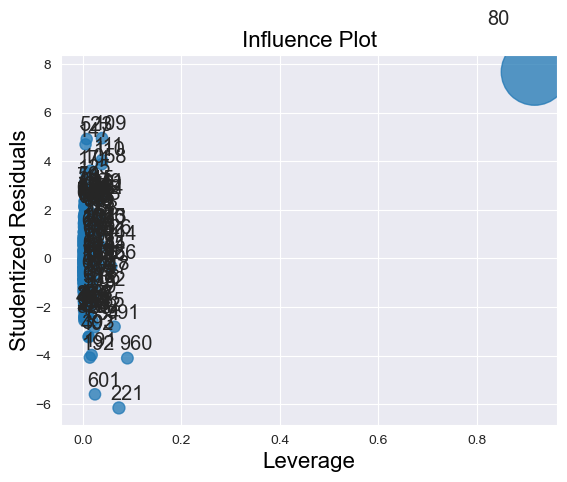

In [40]:
infl.plot_influence()

In [41]:
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif["features"] = X.columns

vif.round(1)

,VIF Factor,features
0,16.4,Age_08_04
1,7.6,KM
2,64.9,HP
3,17.2,cc
4,21.9,Doors
5,438.6,Gears
6,11.0,Quarterly_Tax
7,543.1,Weight


In [43]:
new_X = car[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]

new_model = sm.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)

new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.155e+04
Date:                Sat, 10 Feb 2024   Prob (F-statistic):                        0.00
Time:                        01:45:58   Log-Likelihood:                         -12532.
No. Observations:                1436   AIC:                                  2.508e+04
Df Residuals:                    1429   BIC:                                  2.512e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0628      2.682    -49.245      0.000    -137.323    -126.802
KM               -0.0208      0.001    -14.947      0.000      -0.024      -0.018
HP               44.4711      3.027     14.692      0.000      38.533      50.409
cc                0.1805      0.099      1.827      0.068      -0.013       0.374
Doors           272.5298     41.159      6.621      0.000     191.791     353.269
Gears          2417.9083     81.331     29.729      0.000    2258.368    2577.449
Quarterly_Tax    17.0169      1.177     14.462      0.000      14.709      19.325
==============================================================================
Omnibus:                      184.883   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.580
Skew:                           0.640   Prob(JB):                    1.89e-127
Kurtosis:                       5.849   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
new_df = car.drop(car.index[80])

new_X = new_df[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]
new_Y = new_df[['Price']]

final_model = sm.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.152e+04
Date:                Sat, 10 Feb 2024   Prob (F-statistic):                        0.00
Time:                        01:46:43   Log-Likelihood:                         -12524.
No. Observations:                1435   AIC:                                  2.506e+04
Df Residuals:                    1428   BIC:                                  2.510e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0191      2.684    -49.196      0.000    -137.283    -126.755
KM               -0.0210      0.001    -14.581      0.000      -0.024      -0.018
HP               43.7530      3.287     13.310      0.000      37.304      50.202
cc                0.3468      0.313      1.109      0.268      -0.267       0.960
Doors           270.3889     41.346      6.540      0.000     189.284     351.494
Gears          2394.0486     91.807     26.077      0.000    2213.957    2574.140
Quarterly_Tax    16.4778      1.520     10.843      0.000      13.497      19.459
==============================================================================
Omnibus:                      183.937   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.178
Skew:                           0.636   Prob(JB):                    3.82e-127
Kurtosis:                       5.849   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""